- In this handson you will be building a deep neural network using tensorflow for binary classification
- The dataset has two features('feature1' and 'feature2') and one target variable
- The target variable(named as 'class') maps each record to either 0 or 1
- Some of the necessary pacakges required to read file and data visualization has been imported for you

In [1]:
#Run this cell without modifying
import hashlib
import pickle
def gethex(ovalue):
  hexresult=hashlib.md5(str(ovalue).encode())
  return hexresult.hexdigest()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

The data is provided as file named 'blobs.csv' in data folder.

Using pandas read the csv file and assign the resulting dataframe to variable 'data'   
for example if file name is 'xyz.csv' read file as **pd.read_csv('xyz.csv')** 

In [3]:
##Start code here
data = pd.read_csv(r"data/blobs.csv")
##End code

The following code extacts features and target variable and assign it to variable X and y respectively

In [4]:
X = data[['feature1', 'feature2']].values
y = data['class'].values

- Run the below piece of  code to visualize the data in x-y plane.The green and blue dots corresponds to class 0 and 1 respectively
- You can see that the data is not linearly seperable i.e you cannot draw one specific boundary to classify the data.

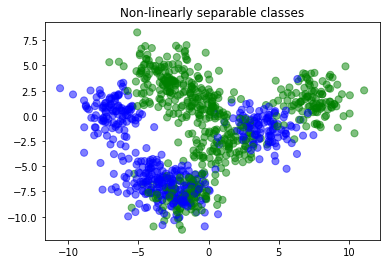

In [5]:
colors=['green','blue']
cmap = matplotlib.colors.ListedColormap(colors)
#Plot the figure
plt.figure()
plt.title('Non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y,
           marker= 'o', s=50,cmap=cmap,alpha = 0.5 )
plt.show()

- Before diving into deep neural network lets try to classify the data using simple logistic regression.    
- The code for logistic regression has been written for you.
- Run the below cell to build a simple logistic regression model

In [6]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
_ = lr_model.fit(X, y)

- Run the below cell to define the method to plot the decision boundary.The code for visualization has been written for you.

In [7]:
def plot_decision_boundary( X, y, model):
    plt.clf()
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1   
    colors=['blue','green']
    cmap = matplotlib.colors.ListedColormap(colors)   
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    A = model(np.c_[xx.ravel(), yy.ravel()])
    A = A.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, A, cmap="spring")
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, s=8,cmap=cmap)
    plt.title("Decision Boundary for learning rate:")
    plt.show()

- Run the cell below cell to plot the decision boundary perdicted by logistic regression model

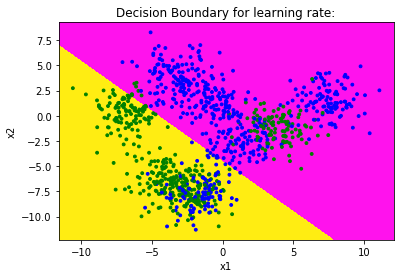

[[  4.26463233  -2.07379121  -1.89389268 ...  -1.23942832   3.54528985
   -2.15379908]
 [ -2.67936072 -10.0590994    4.50484717 ...  -8.23774512  -0.92818955
   -0.70460594]]


In [8]:
plot_decision_boundary(X.T,y,lambda x: lr_model.predict(x))
print(X.T)

- From the above plot you can say that simple logistic regression poorly perfroms in classifying the data since the decision boundary is not able to effectively classify the two classes.
- Now build a deep neural network to classify the same data.  
Preparing the data:  
    - Transpose X so that rows represents the features and column represents samples. Assig the resulting array to variable X_data
    - Reshape data y to a row vector whose length equal to number of samples.Assign the resulting vector to variable y_data

In [9]:
##Start code here
X_data = X.reshape((2,1000))
y_data = y.reshape((1,1000))
##End code

Define the layer dimension as an array  called **'layer_dims'**  with one input layer **equal to number of features**, **two hidden layer** with **nine nodes** each and **one final output layer** with** one node**.


In [10]:
##Start code here
layer_dims = [2, 9, 9, 1,]
##End code

Import tensorflow package as tf

In [11]:
##Start code here
import tensorflow as tf
##End code

Define a function named placeholders to return two placeholders one for input data as A_0 and one for output data as Y.
- Set the datatype of placeholders as float64
- parameters - num_features
- Returns - A_0 with shape (num_feature, None) and Y with shape(1,None)


In [12]:
def placeholders(num_features):
  ##Start code here
  A_0 = tf.placeholder(dtype = tf.float64, shape = ([num_features,None]))
  Y = tf.placeholder(dtype = tf.float64, shape = ([1,None]))
  return A_0,Y
  ##End code

Define function named initialize_parameters_deep() to initialize weights and bias for each layer
- Use tf.random_normal() to initialise weights and tf.zeros() to initialise bias. Set datatype as float64
- Parameters - layer_dims
- Returns - dictionary of weights and bias

In [13]:
def initialize_parameters_deep(layer_dims):
  L = len(layer_dims)
  parameters = {}
  for l in range(1,L):
    parameters['W' + str(l)] = tf.Variable(initial_value=tf.random_normal([layer_dims[l], layer_dims[l-1]], dtype=tf.float64)* 0.01)
    parameters['b' + str(l)] = tf.Variable(initial_value=tf.zeros([layer_dims[l],1],dtype=tf.float64) * 0.01)
 
  
  return parameters 

Define functon named linear_forward_prop() to define forward propagation for a given layer.
- parameters: A_prev(output from previous layer), W(weigth matrix of current layer), b(bias vector for current layer),activation(type of activation to be used for out of current layer)  
- returns: A(output from the current layer)
- Use relu activation for hidden layers and for final output layer return the output unactivated i.e if activation is sigmoid

In [14]:
def linear_forward_prop(A_prev,W,b, activation):
  Z = tf.add(tf.matmul(W, A_prev), b)
  if activation == "sigmoid":
    A = Z
  elif activation == "relu":
    A = tf.nn.relu(Z)                                            #apply relu activation on Z using tf.nn.relu() function
  return A

Define forward propagation for entire network as l_layer_forward()
- Parameters: A_0(input data), parameters(dictionary of weights and bias)
- returns: A(output from final layer)

In [15]:
def l_layer_forwardProp(A_0, parameters):
  A = A_0
  L = len(parameters)//2
  for l in range(1,L):
    A_prev = A
    A = linear_forward_prop(A_prev,parameters['W' + str(l)],parameters['b' + str(l)], "relu")
  A_final = linear_forward_prop(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid" )
  return A_final

- Define the model as deep_layer_network()
- Parameters: X(input data), Y(output data), layer_dims, learning_rate, num_iter(number of iterations)
- returns: parameters ( dictionary of updated weights and bias)

In [16]:
def deep_layer_network(X_data,y_data, layer_dims, learning_rate, num_iter):
  num_features = layer_dims[0]
  A_0, Y =  placeholders(num_features)                                       #call placeholder function to initialize placeholders A_0 and Y
  parameters =  initialize_parameters_deep(layer_dims)                                   #Initialse Weights and bias using initialize_parameters_deep() with layer_dims as parameters  
  Z_final = l_layer_forwardProp(A_0, parameters)                                       #call the function l_layer_forwardProp() to define the final output
  cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z_final,labels=Y))                                           #define the mean cost using sigmoid cross entropy function
  train_net = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)                                     #call tensorflow's gradient descent optimizer function with minimize cost  
  init = tf.global_variables_initializer()    
  
  with tf.Session() as sess:
    sess.run(init)
    for i in range(num_iter):
      _,c = sess.run([train_net, cost], feed_dict={A_0: X_data, Y: y_data})
      if i % 1000 == 0:
        print(c)
    #Stores your output in pickle file for validation. Donot modify
    with open('output/output1.pkl', 'wb') as file: 
      hexresult=gethex(round(c,2))
      pickle.dump(hexresult,file)
    params = sess.run(parameters)
  return params

- Train the deep neural network with learning rate 0.3 and number of iterations to 10000
- Use X_data and Y_data to train the network

In [17]:
parameters = deep_layer_network(X_data, y_data, layer_dims, 0.3, 10000)    #fill the parameters 

0.6931490517236188
0.6868617859424175
0.6868616702569634
0.6868614471668193
0.6868609256256624
0.6868594427653256
0.6868496400741229
0.686365487685734
0.6826789896535856
0.6806921016044355


Run the cell below to define the method to predict outputof the model for given input and parameters.The code has been written for you

In [18]:
def predict(A_0, parameters):
  with tf.Session() as sess:
    Z = l_layer_forwardProp(A_0, parameters)
    A = sess.run(tf.round(tf.sigmoid(Z)))
  return A

Run the below cell to plot the decision boundary predicted by the deep nural network

In [19]:
print(X_data.shape)

(2, 1000)


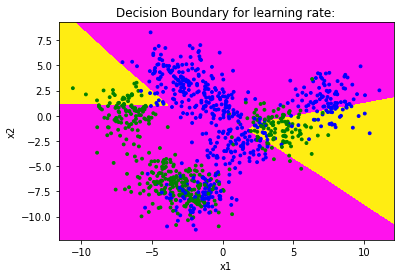

In [20]:
plot_decision_boundary(X.T,y,lambda x: predict(x.T,parameters))